In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, f1_score, make_scorer
from imblearn.over_sampling import SMOTE

In [2]:
df_train = pd.read_csv('train.csv')

,Class,total count
0,0,509
1,1,108


,AB,AF,AH,AM,AR,AX,AY,AZ,BC,BD,...,FL,FR,FS,GB,GE,GF,GH,GI,GL,Class
count,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,...,616.000000,617.000000,615.000000,617.000000,617.000000,617.000000,617.000000,617.000000,616.000000,617.000000
mean,0.477149,3502.013221,118.624513,38.968552,10.128242,5.545576,0.060320,10.566447,8.053012,5350.388655,...,5.433199,3.533905,0.421501,20.724856,131.714987,14679.595398,31.489716,50.584437,8.530961,0.175041
std,0.468388,2300.322717,127.838950,69.728226,10.518877,2.551696,0.416817,4.350645,65.166943,3021.326641,...,11.496257,50.181948,1.305365,9.991907,144.181524,19352.959387,9.864239,36.266251,10.327010,0.380310
min,0.081187,192.593280,85.200147,3.177522,8.138688,0.699861,0.025578,3.396778,1.229900,1693.624320,...,0.173229,0.497060,0.067730,4.102182,72.611063,13.038894,9.432735,0.897628,0.001129,0.000000
25%,0.252107,2197.345480,85.200147,12.270314,8.138688,4.128294,0.025578,8.129580,1.229900,4155.702870,...,0.173229,0.497060,0.067730,14.036718,72.611063,2798.992584,25.034888,23.011684,0.124392,0.000000
50%,0.354659,3120.318960,85.200147,20.533110,8.138688,5.031912,0.025578,10.461320,1.229900,4997.960730,...,3.028141,1.131000,0.250601,18.771436,72.611063,7838.273610,30.608946,41.007968,0.337827,0.000000
75%,0.559763,4361.637390,113.739540,39.139886,8.138688,6.431634,0.036845,12.969516,5.081244,6035.885700,...,6.238814,1.512060,0.535067,25.608406,127.591671,19035.709240,36.863947,67.931664,21.978000,0.000000
max,6.161666,28688.187660,1910.123198,630.518230,178.943634,38.270880,10.315851,38.971568,1463.693448,53060.599240,...,137.932739,1244.227020,31.365763,135.781294,1497.351958,143790.071200,81.210825,191.194764,21.978000,1.000000


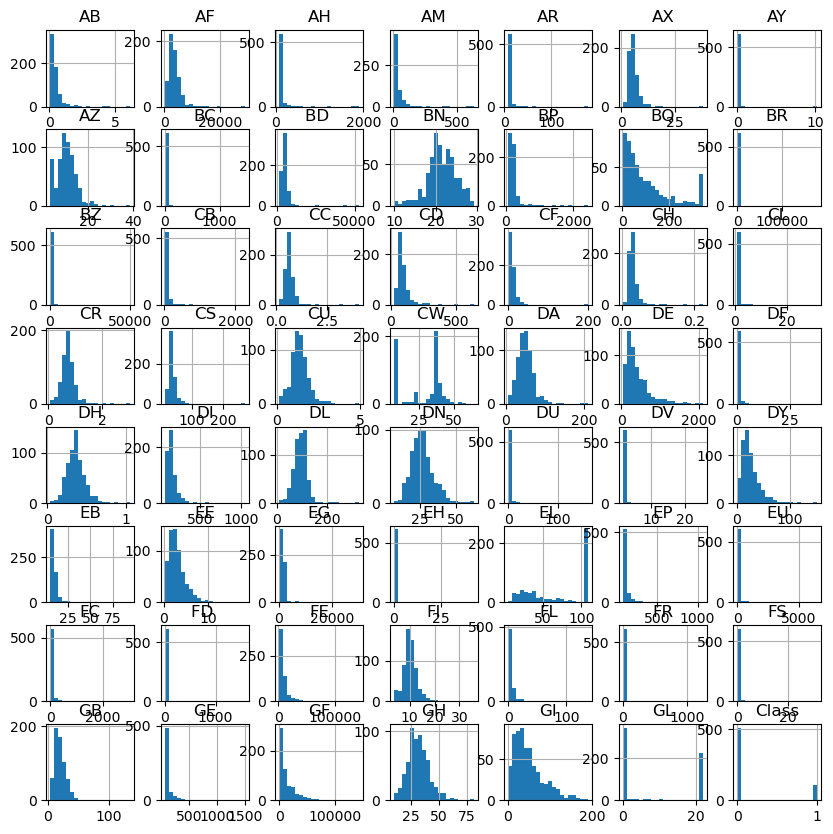

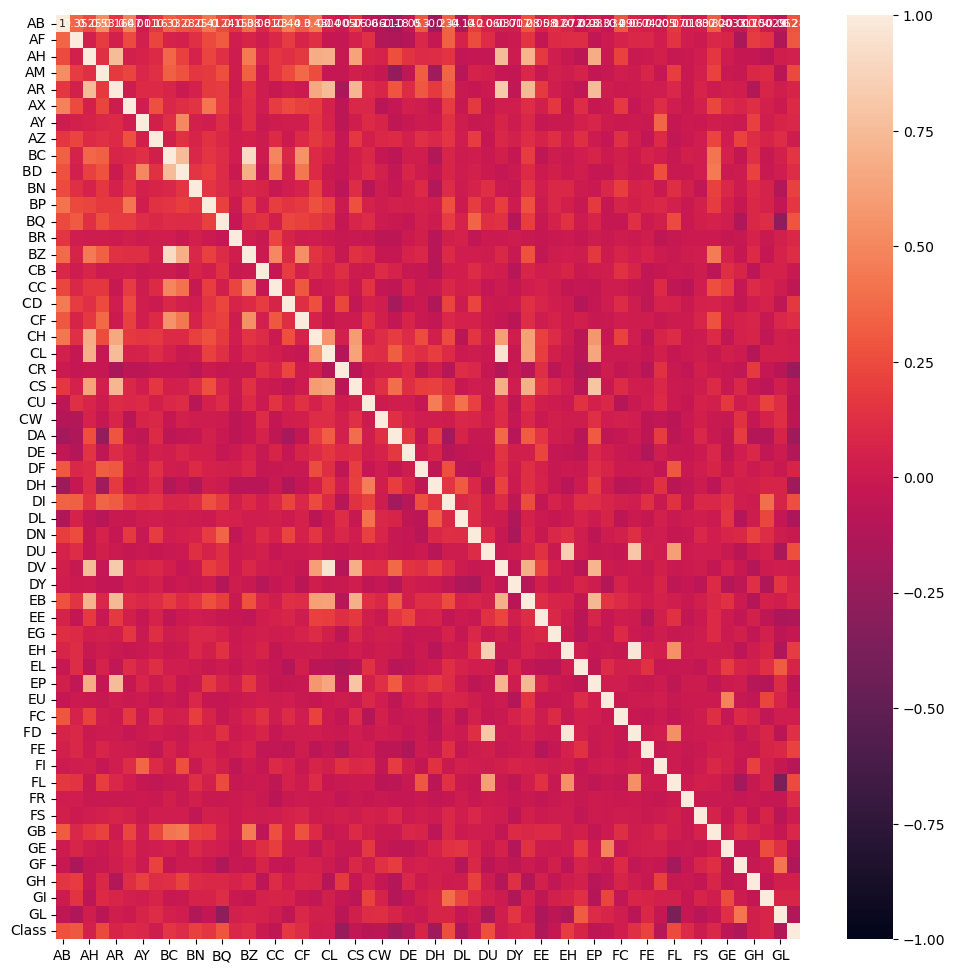

In [3]:
display(df_train['Class'].value_counts().reset_index(name='total count'))

display(df_train.describe())

df_train.hist(bins=20, figsize=(10, 10))
plt.show()

df_train_numeric = df_train.select_dtypes(include=[np.number])

corr_matrix = df_train_numeric.corr()

plt.figure(figsize=(12, 12))
sb.heatmap(corr_matrix, annot=True, annot_kws={"fontsize": 8}, vmin=-1, vmax=1)
plt.show()


In [4]:
df_train.fillna(0, inplace=True)
df_train['EJ'] = df_train['EJ'].replace({'A': 1, 'B': 0})
display(df_train.head())

,Id,AB,AF,AH,AM,AR,AX,AY,AZ,BC,...,FL,FR,FS,GB,GE,GF,GH,GI,GL,Class
0,000ff2bfdfe9,0.209377,3109.03329,85.200147,22.394407,8.138688,0.699861,0.025578,9.812214,5.555634,...,7.298162,1.73855,0.094822,11.339138,72.611063,2003.810319,22.136229,69.834944,0.120343,1
1,007255e47698,0.145282,978.76416,85.200147,36.968889,8.138688,3.632190,0.025578,13.517790,1.229900,...,0.173229,0.49706,0.568932,9.292698,72.611063,27981.562750,29.135430,32.131996,21.978000,0
2,013f2bd269f5,0.470030,2635.10654,85.200147,32.360553,8.138688,6.732840,0.025578,12.824570,1.229900,...,7.709560,0.97556,1.198821,37.077772,88.609437,13676.957810,28.022851,35.192676,0.196941,0
3,043ac50845d5,0.252107,3819.65177,120.201618,77.112203,8.138688,3.685344,0.025578,11.053708,1.229900,...,6.122162,0.49706,0.284466,18.529584,82.416803,2094.262452,39.948656,90.493248,0.155829,0
4,044fb8a146ec,0.380297,3733.04844,85.200147,14.103738,8.138688,3.942255,0.054810,3.396778,102.151980,...,8.153058,48.50134,0.121914,16.408728,146.109943,8524.370502,45.381316,36.262628,0.096614,1


The best features are:  ['AZ', 'BD ', 'BN', 'BP', 'BR', 'CB', 'CD ', 'CH', 'CR', 'CS', 'CW ', 'DE', 'DH', 'DI', 'DN', 'DU', 'DV', 'DY', 'EB', 'EE', 'EG', 'EH', 'EL', 'EP', 'FC', 'FD ', 'FE', 'FI', 'FR', 'FS', 'GE', 'GF', 'GH']
The best accuracy is: 0.9112903225806451


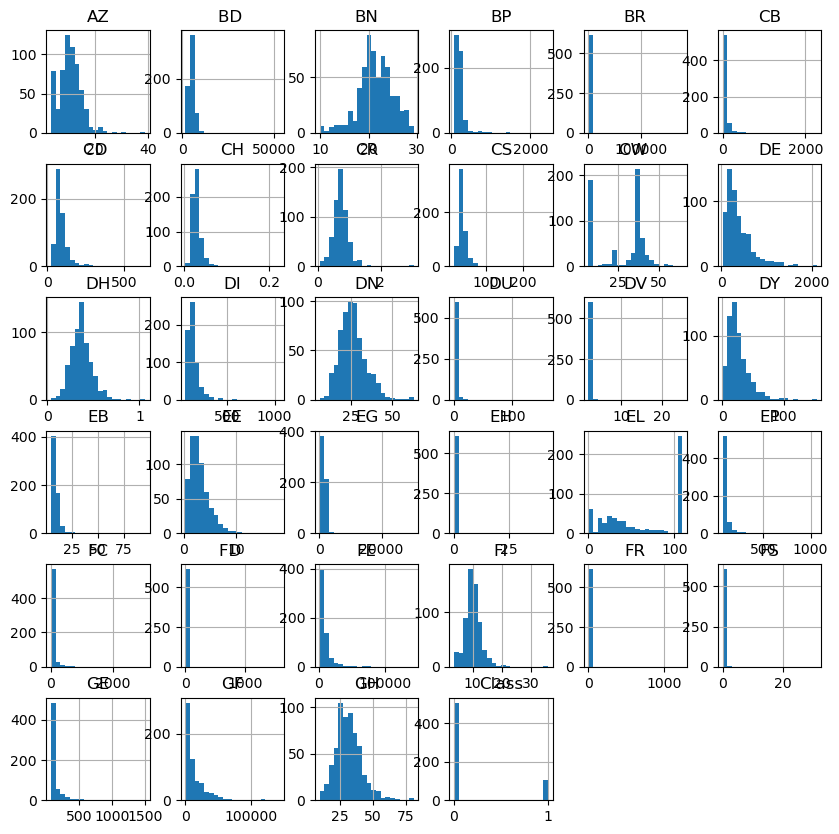

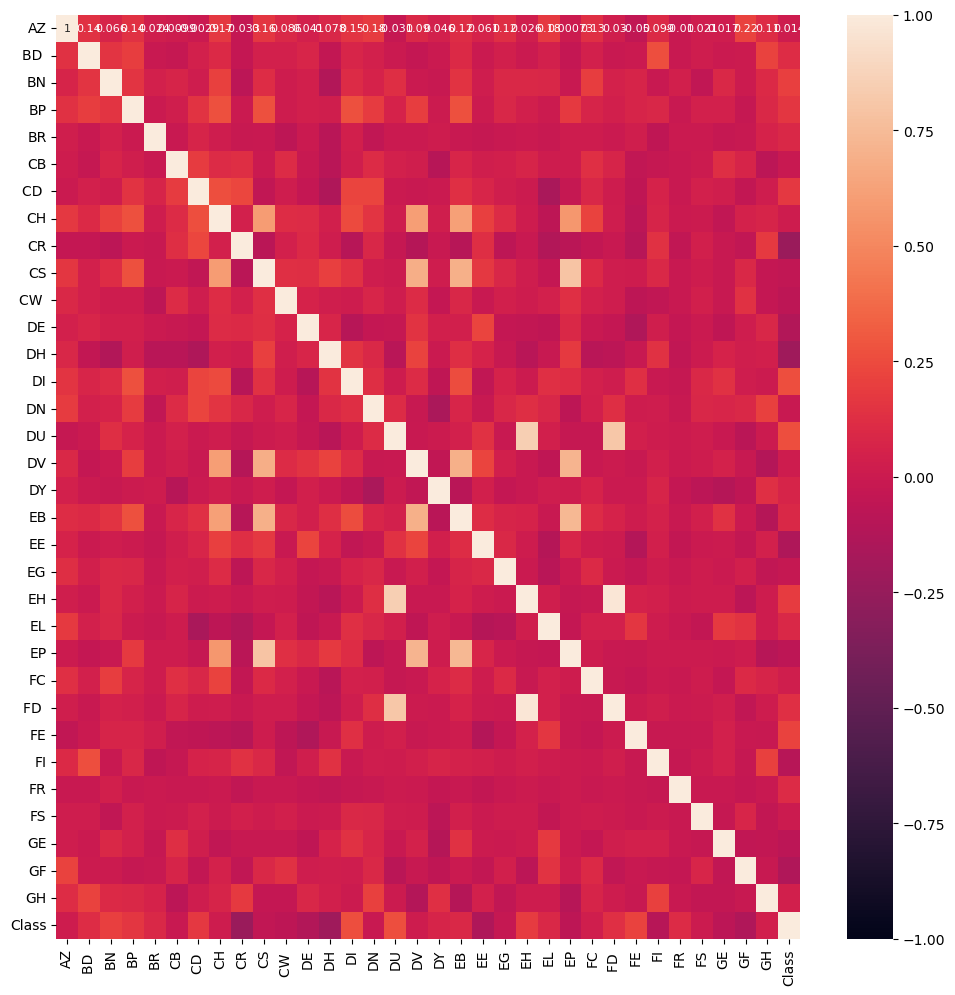

In [5]:
df_features = df_train.drop(columns=['Id', 'Class'])

corr_matrix = df_features.corr().abs()

correlated_lower = 0.3
correlated_upper = 0.5

corr_pairs_in_range = []

for i in range(corr_matrix.shape[0]):
    for j in range(i+1, corr_matrix.shape[1]):
        correlation_value = corr_matrix.iloc[i, j]
        if correlated_lower <= correlation_value <= correlated_upper:
            corr_pairs_in_range.append((corr_matrix.index[i], corr_matrix.columns[j], correlation_value))

def evaluate_model(features):
    X = df_train[features]
    y = df_train['Class']

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

    model = LogisticRegression(max_iter=2000, solver='lbfgs') 
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    return accuracy_score(y_test, y_pred)

remaining_features = df_features.columns.tolist()
best_accuracy = evaluate_model(remaining_features)
best_feature_set = remaining_features

for feature1, feature2, _ in corr_pairs_in_range:
    features_without_f1 = [f for f in remaining_features if f != feature1]
    accuracy_without_f1 = evaluate_model(features_without_f1)
    features_without_f2 = [f for f in remaining_features if f != feature2]
    accuracy_without_f2 = evaluate_model(features_without_f2)
    if accuracy_without_f1 >= best_accuracy:
        best_accuracy = accuracy_without_f1
        remaining_features = features_without_f1
    elif accuracy_without_f2 >= best_accuracy:
        best_accuracy = accuracy_without_f2
        remaining_features = features_without_f2

best_feature_set = remaining_features
print("The best features are: ", best_feature_set)
print("The best accuracy is:", best_accuracy)

df_train = df_train[best_feature_set + ['Class']]

df_train.hist(bins=20, figsize=(10, 10))
plt.show()

plt.figure(figsize=(12, 12))
sb.heatmap(df_train.corr(), annot=True, annot_kws={"fontsize": 8}, vmin=-1, vmax=1)
plt.show()

In [6]:
df_train = pd.get_dummies(df_train, drop_first=True)

X = np.ascontiguousarray(df_train[best_feature_set])
y = df_train['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

f1_scorer = make_scorer(f1_score, average='weighted')

classifiers = {
    'Random Forest': RandomForestClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Artificial Neural Network': MLPClassifier(max_iter=2000),
    'Decision Tree': DecisionTreeClassifier()
}

param_grids = {
    'Random Forest': {'n_estimators': [50, 100], 'max_features': ['sqrt', 'log2'], 'min_samples_split': [2, 10]},
    'K-Nearest Neighbors': {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance'], 'metric': ['euclidean', 'manhattan']},
    'Naive Bayes': {},  # No hyperparameters to tune for GaussianNB
    'Artificial Neural Network': {'hidden_layer_sizes': [(50,), (100,)], 'activation': ['tanh', 'relu'], 'solver': ['sgd', 'adam']},
    'Decision Tree': {'max_depth': [None, 10, 20], 'min_samples_split': [2, 10]}
}

best_estimators = {}
best_scores = {}
for model_name, model in classifiers.items():
    grid_search = GridSearchCV(model, param_grids[model_name], cv=5, scoring=f1_scorer)
    grid_search.fit(X_train_smote, y_train_smote)
    best_estimators[model_name] = grid_search.best_estimator_
    best_scores[model_name] = grid_search.best_score_  # Save the best score
    print(f"\nBest parameters for {model_name}: {grid_search.best_params_}")
    print(f"Best cross-validation F1-Score for {model_name}: {grid_search.best_score_}")

results = {
    'Model': [],
    'Best Params': [],
    'Best F1-Score': []
}

for model_name, estimator in best_estimators.items():
    results['Model'].append(model_name)
    results['Best Params'].append(estimator.get_params())
    results['Best F1-Score'].append(best_scores[model_name])  # Use the saved best score

results_df = pd.DataFrame(results)
print("\nComparison of Results:")
display(results_df)

best_model_name = results_df.loc[results_df['Best F1-Score'].idxmax()]['Model']
best_model_params = results_df.loc[results_df['Best F1-Score'].idxmax()]['Best Params']
print(f"\nBest Model: {best_model_name} with params: {best_model_params}")



Best parameters for Random Forest: {'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 100}
Best cross-validation F1-Score for Random Forest: 0.9448611418391145

Best parameters for K-Nearest Neighbors: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
Best cross-validation F1-Score for K-Nearest Neighbors: 0.8329771304929633

Best parameters for Naive Bayes: {}
Best cross-validation F1-Score for Naive Bayes: 0.6770942605664259

Best parameters for Artificial Neural Network: {'activation': 'relu', 'hidden_layer_sizes': (100,), 'solver': 'adam'}
Best cross-validation F1-Score for Artificial Neural Network: 0.7724000672225173

Best parameters for Decision Tree: {'max_depth': 10, 'min_samples_split': 2}
Best cross-validation F1-Score for Decision Tree: 0.8910104228550623

Comparison of Results:


,Model,Best Params,Best F1-Score
0,Random Forest,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",0.944861
1,K-Nearest Neighbors,"{'algorithm': 'auto', 'leaf_size': 30, 'metric...",0.832977
2,Naive Bayes,"{'priors': None, 'var_smoothing': 1e-09}",0.677094
3,Artificial Neural Network,"{'activation': 'relu', 'alpha': 0.0001, 'batch...",0.772400
4,Decision Tree,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",0.891010



Best Model: Random Forest with params: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
